In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()
#There is no anomaly seen in the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Unique values in the dataset
for x in df.columns:
    y  = df[x].nunique()
    print(f'The unique values in Column {x} are {y}')

The unique values in Column Ship Mode are 4
The unique values in Column Segment are 3
The unique values in Column Country are 1
The unique values in Column City are 531
The unique values in Column State are 49
The unique values in Column Postal Code are 631
The unique values in Column Region are 4
The unique values in Column Category are 3
The unique values in Column Sub-Category are 17
The unique values in Column Sales are 5825
The unique values in Column Quantity are 14
The unique values in Column Discount are 12
The unique values in Column Profit are 7287


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [11]:
# The most frequent Categorical values are found out

In [10]:
# Checking for the null values
df.isnull().sum().sort_values(ascending=False)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
#Percentage of null values
round((df.isnull().sum().sort_values(ascending=False)/len(df)*100),2)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [4]:
#Dropping the duplicate values
df.duplicated().sum()



17

In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [5]:
#Separating the categorical features for EDA
#Categorical data
df_cat = df[df.dtypes[df.dtypes == 'object'].index]
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [18]:
df['Ship Mode'].unique()


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

**EDA**

Univariate Analysis


In [21]:
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ship Mode     9977 non-null   object
 1   Segment       9977 non-null   object
 2   Country       9977 non-null   object
 3   City          9977 non-null   object
 4   State         9977 non-null   object
 5   Region        9977 non-null   object
 6   Category      9977 non-null   object
 7   Sub-Category  9977 non-null   object
dtypes: object(8)
memory usage: 959.5+ KB


In [32]:
df = df.astype(str)

In [39]:
df['Region'].astype(str)

0       South
1       South
2        West
3       South
4       South
        ...  
9989    South
9990     West
9991     West
9992     West
9993     West
Name: Region, Length: 9977, dtype: object

In [41]:
df['Region'].value_counts()

Region
West       3193
East       2845
Central    2319
South      1620
Name: count, dtype: int64

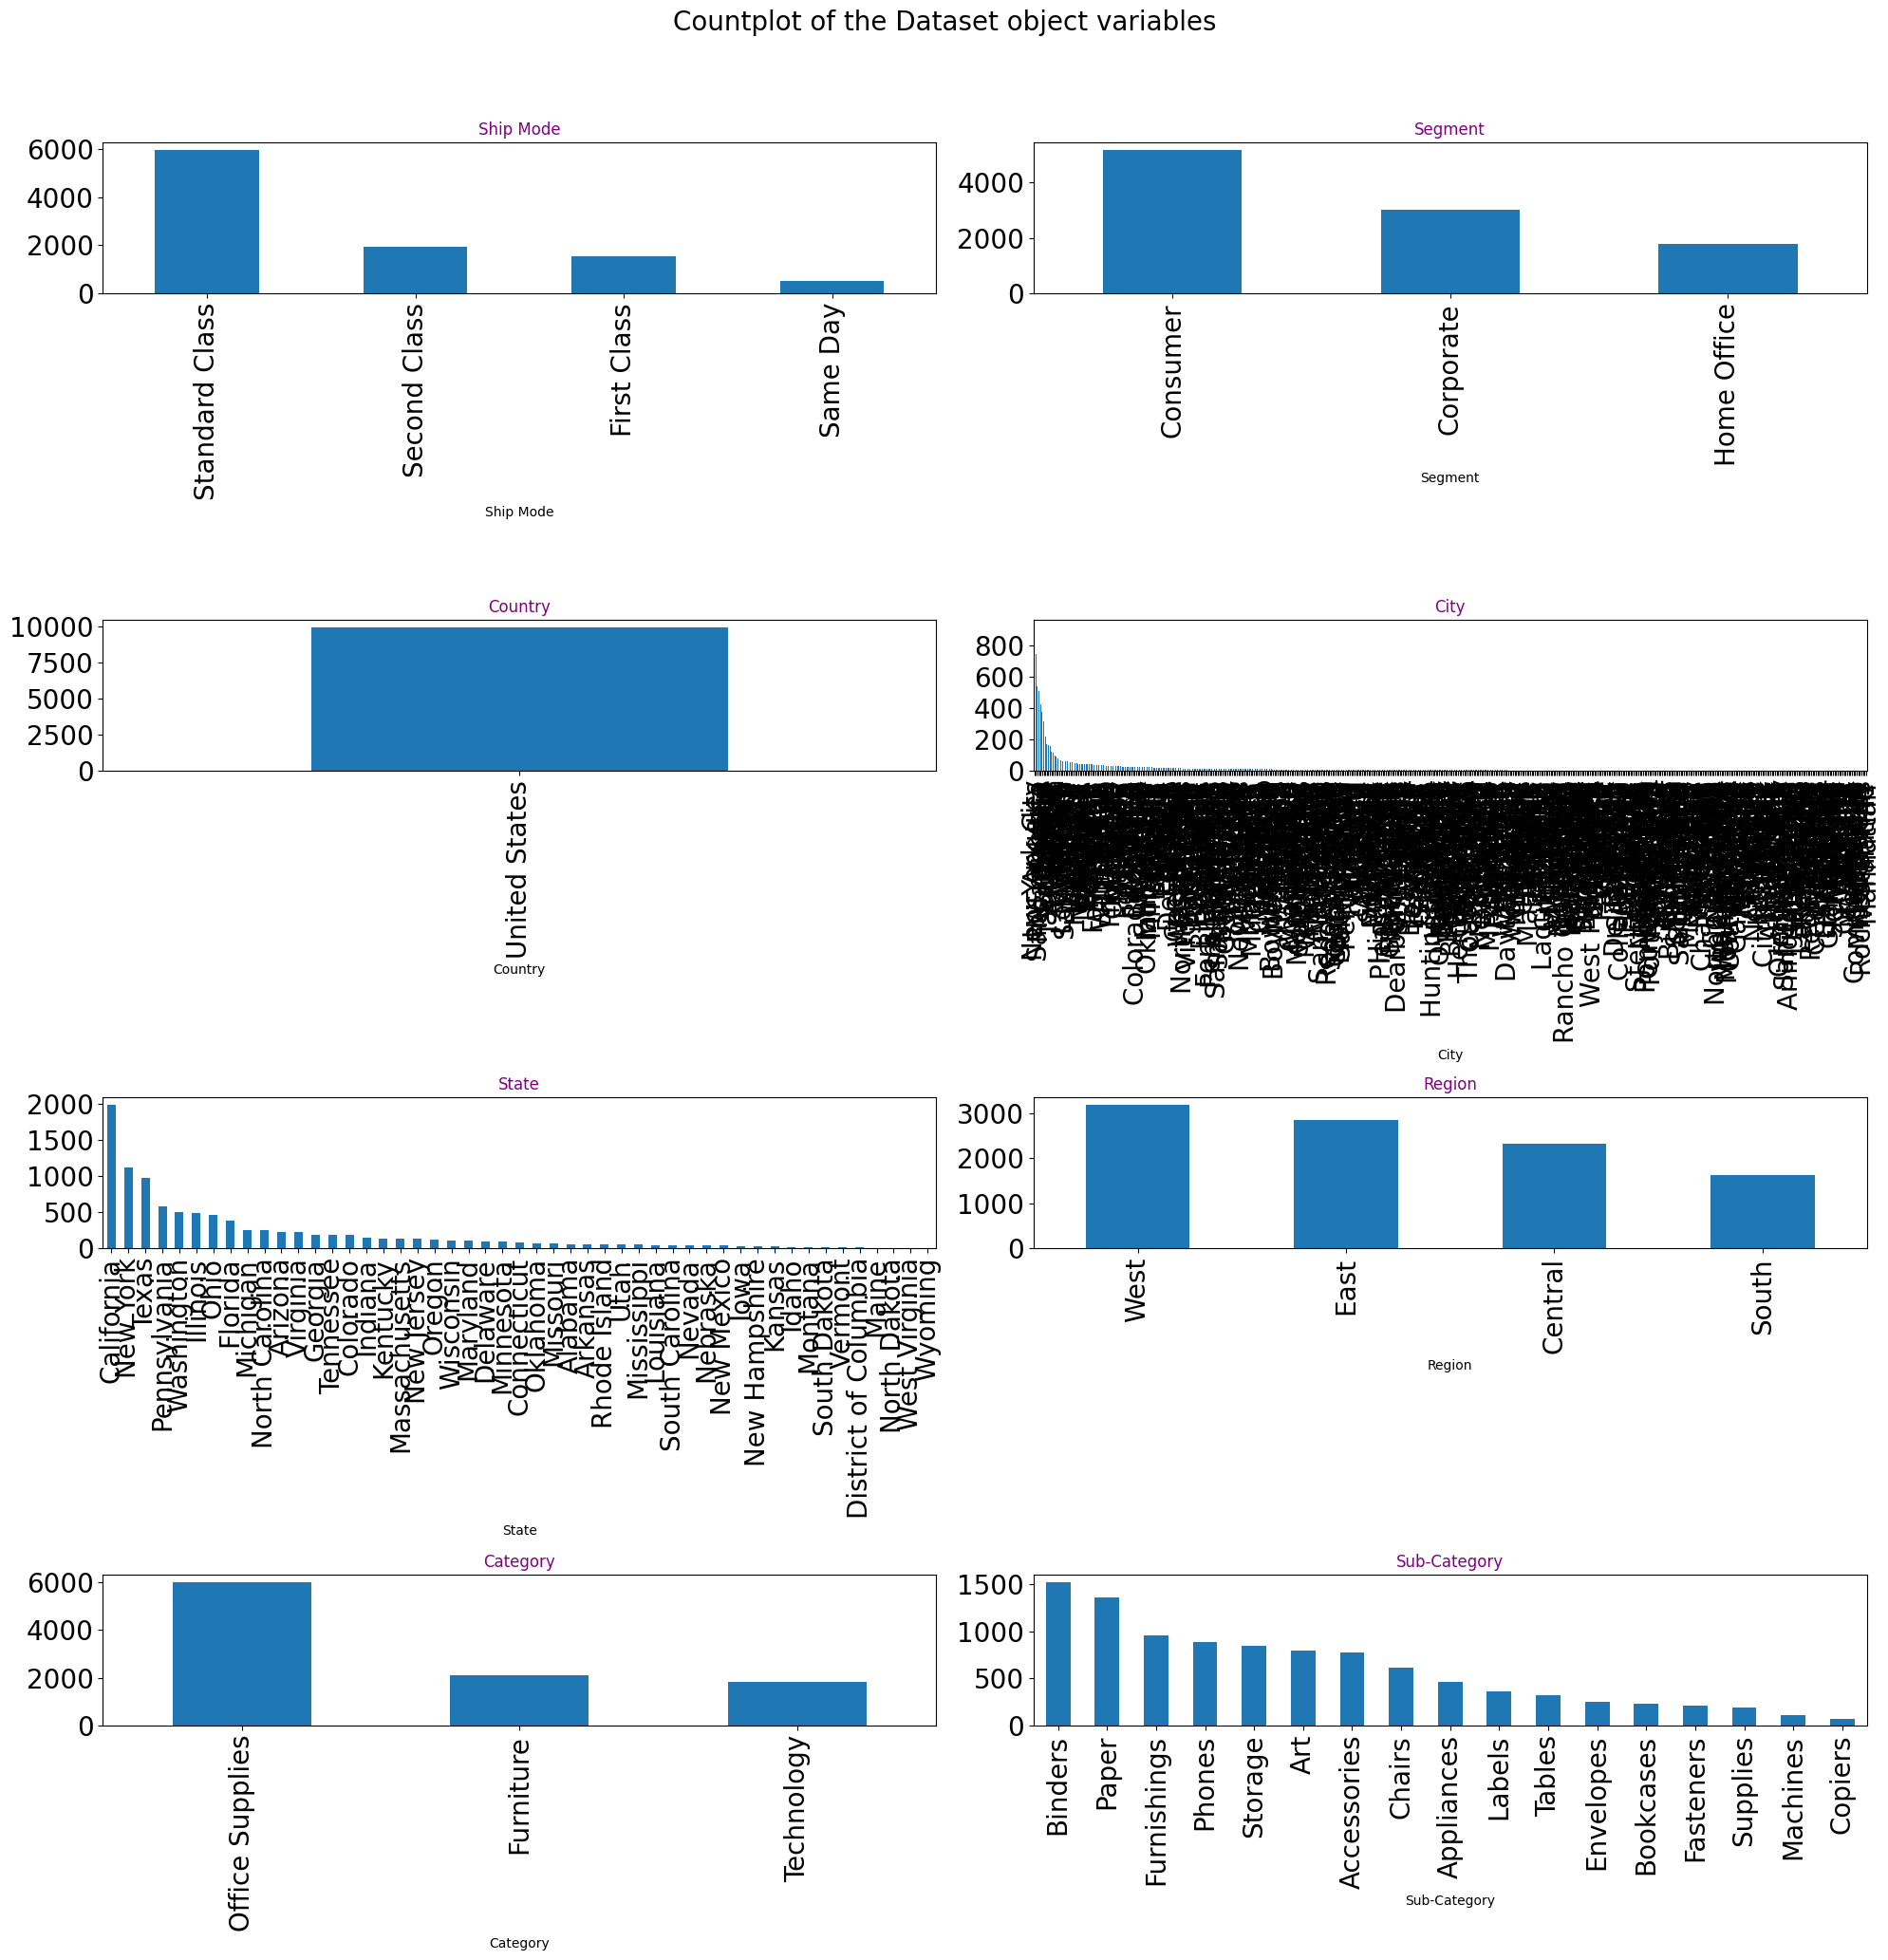

In [53]:
# Univariate analysis of Categorical variables
fig=plt.figure(figsize=(20,20))
fig.suptitle('Countplot of the Dataset object variables', y=1.03, fontsize=20)
for i in range(0,df_cat.shape[1]):
    ax=fig.add_subplot(4,2,i+1)
    df_cat[df_cat.columns[i]].value_counts().plot.bar()
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    ax.set_title(df_cat.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [6]:
# Removing the Country and Shipping column
df1 = df_cat.drop(['Country','Ship Mode','State','Region'], axis=1)
df1.head()

,Segment,City,Category,Sub-Category
0,Consumer,Henderson,Furniture,Bookcases
1,Consumer,Henderson,Furniture,Chairs
2,Corporate,Los Angeles,Office Supplies,Labels
3,Consumer,Fort Lauderdale,Furniture,Tables
4,Consumer,Fort Lauderdale,Office Supplies,Storage


In [23]:
df2=pd.get_dummies(df1)
df2.head()

,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aberdeen,City_Abilene,City_Akron,City_Albuquerque,City_Alexandria,City_Allen,City_Allentown,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


**Apriori Algorithm**

In [25]:
frequent_itemsets = apriori(df2, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.519495,(Segment_Consumer)
1,0.302195,(Segment_Corporate)
2,0.178310,(Segment_Home Office)
3,0.212288,(Category_Furniture)
4,0.602586,(Category_Office Supplies)
5,0.185126,(Category_Technology)
6,0.152551,(Sub-Category_Binders)
7,0.136213,(Sub-Category_Paper)
8,0.111456,"(Segment_Consumer, Category_Furniture)"
9,0.312719,"(Category_Office Supplies, Segment_Consumer)"


In [33]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(Category_Office Supplies),(Sub-Category_Binders),0.602586,0.152551,0.152551,0.253160,1.659514,0.060626,1.134714,1.000000
9,(Sub-Category_Binders),(Category_Office Supplies),0.152551,0.602586,0.152551,1.000000,1.659514,0.060626,inf,0.468953
10,(Sub-Category_Paper),(Category_Office Supplies),0.136213,0.602586,0.136213,1.000000,1.659514,0.054133,inf,0.460084
11,(Category_Office Supplies),(Sub-Category_Paper),0.602586,0.136213,0.136213,0.226048,1.659514,0.054133,1.116073,1.000000
0,(Segment_Consumer),(Category_Furniture),0.519495,0.212288,0.111456,0.214548,1.010643,0.001174,1.002876,0.021916
1,(Category_Furniture),(Segment_Consumer),0.212288,0.519495,0.111456,0.525024,1.010643,0.001174,1.011640,0.013368
7,(Segment_Home Office),(Category_Office Supplies),0.178310,0.602586,0.107948,0.605396,1.004664,0.000501,1.007122,0.005650
6,(Category_Office Supplies),(Segment_Home Office),0.602586,0.178310,0.107948,0.179142,1.004664,0.000501,1.001013,0.011681
4,(Category_Office Supplies),(Segment_Corporate),0.602586,0.302195,0.181918,0.301896,0.999011,-0.000180,0.999572,-0.002485
5,(Segment_Corporate),(Category_Office Supplies),0.302195,0.602586,0.181918,0.601990,0.999011,-0.000180,0.998503,-0.001417


<Axes: ylabel='Count'>

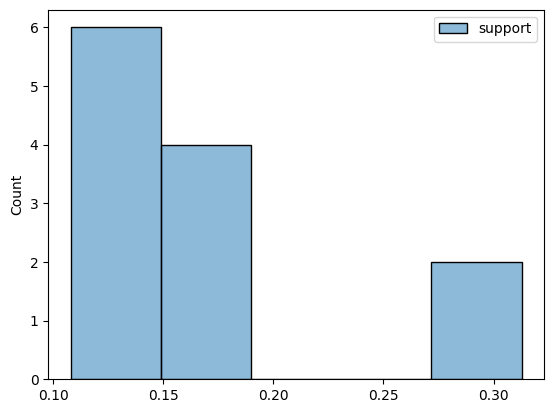

In [27]:
sns.histplot(rules[['support']])


<Axes: ylabel='Count'>

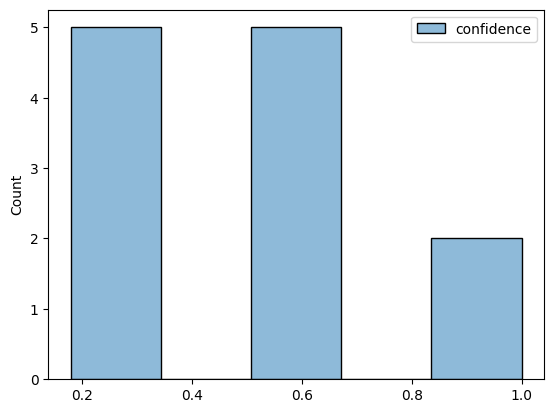

In [28]:
sns.histplot(rules[['confidence']])


<Axes: ylabel='Count'>

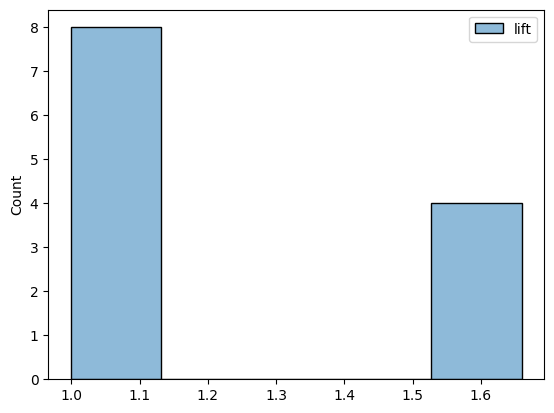

In [29]:
sns.histplot(rules[['lift']])

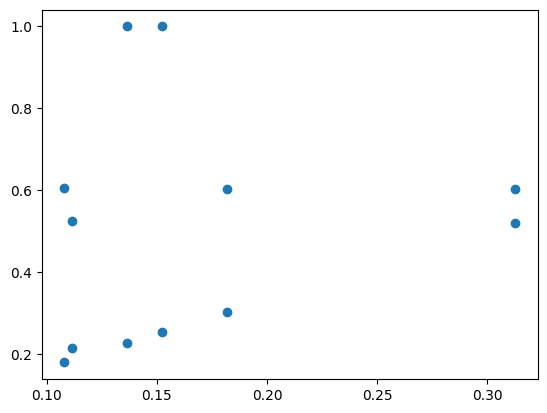

In [30]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()
%matplotlib inline

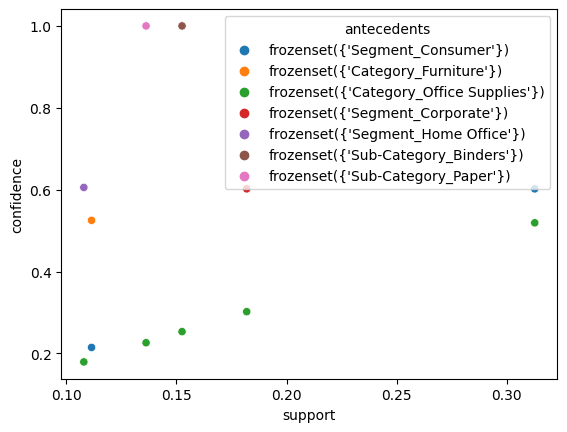

In [31]:
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.show()

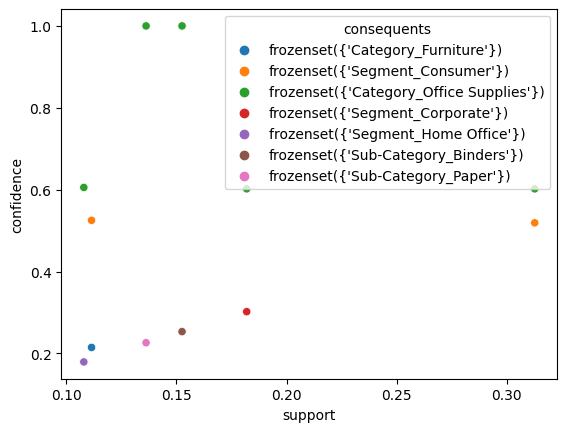

In [32]:
sns.scatterplot(x='support', y='confidence', data=rules, hue='consequents')
plt.show()

In [8]:
# Checking for the frequent itemsets after removing Segment and City as well
df3 = df1.drop(['Segment','City'], axis=1)
df3.head()

,Category,Sub-Category
0,Furniture,Bookcases
1,Furniture,Chairs
2,Office Supplies,Labels
3,Furniture,Tables
4,Office Supplies,Storage


In [9]:
df4=pd.get_dummies(df3)
df4.head()

,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [16]:
frequent_itemsets1 = apriori(df4, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.212288,(Category_Furniture)
1,0.602586,(Category_Office Supplies)
2,0.185126,(Category_Technology)
3,0.152551,(Sub-Category_Binders)
4,0.136213,(Sub-Category_Paper)
5,0.152551,"(Sub-Category_Binders, Category_Office Supplies)"
6,0.136213,"(Sub-Category_Paper, Category_Office Supplies)"


In [17]:
rules = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sub-Category_Binders),(Category_Office Supplies),0.152551,0.602586,0.152551,1.000000,1.659514,0.060626,inf,0.468953
1,(Category_Office Supplies),(Sub-Category_Binders),0.602586,0.152551,0.152551,0.253160,1.659514,0.060626,1.134714,1.000000
2,(Sub-Category_Paper),(Category_Office Supplies),0.136213,0.602586,0.136213,1.000000,1.659514,0.054133,inf,0.460084
3,(Category_Office Supplies),(Sub-Category_Paper),0.602586,0.136213,0.136213,0.226048,1.659514,0.054133,1.116073,1.000000


In [ ]:
# After removing Segment and City, we are getting 4 combinations with the same parameters of Support and Lift.